In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import pickle
import seaborn as sns
pd.set_option('display.max_columns', None)

In [2]:
task_name = 'linear_synthetic_new' #'linear_synthetic' '588'
task = "regression" #"classification" #"regression"
baseline = False
#ablation_directory = f'./results/mdi_local.real_data_{task}/{task_name}/varying_sample_row_n'
ablation_directory = f'./results/mdi_local.synthetic_data_linear/{task_name}/varying_heritability_n'
folder_names = [folder for folder in os.listdir(ablation_directory) if os.path.isdir(os.path.join(ablation_directory, folder))]
experiments_seeds = []
for folder_name in folder_names:
    experiments_seeds.append(int(folder_name[4:]))
combined_df = pd.DataFrame()
for seed in experiments_seeds:
    df = pd.read_csv(os.path.join(ablation_directory, f"seed{seed}/results.csv"))
    combined_df = pd.concat([combined_df, df], ignore_index=True)

# rf_plus_directory = f'/scratch/users/zhongyuan_liang/saved_models/{task_name}'
# combined_df_rf_plus = pd.DataFrame()
# for file in os.listdir(rf_plus_directory):
#     if file.endswith(".csv"):
#         df = pd.read_csv(os.path.join(rf_plus_directory, file))
#         combined_df_rf_plus = pd.concat([combined_df_rf_plus, df], ignore_index=True)

In [3]:
combined_df

,rep,n,n_name,heritability,heritability_name,n_estimators,min_samples_leaf,max_features,random_state,model,fi,train_size,train_subset_size,test_size,test_subset_size,num_features,data_split_seed,sample_train_0,sample_train_1,sample_train_2,sample_train_3,sample_train_4,sample_train_5,sample_train_6,sample_train_7,sample_train_8,sample_train_9,sample_train_10,sample_train_11,sample_train_12,sample_train_13,sample_train_14,sample_train_15,sample_train_16,sample_train_17,sample_train_18,sample_train_19,sample_train_20,sample_train_21,sample_train_22,sample_train_23,sample_train_24,sample_train_25,sample_train_26,sample_train_27,sample_train_28,sample_train_29,sample_train_30,sample_train_31,sample_train_32,sample_train_33,sample_train_34,sample_train_35,sample_train_36,sample_train_37,sample_train_38,sample_train_39,sample_train_40,sample_train_41,sample_train_42,sample_train_43,sample_train_44,sample_train_45,sample_train_46,sample_train_47,sample_train_48,sample_train_49,sample_train_50,sample_train_51,sample_train_52,sample_train_53,sample_train_54,sample_train_55,sample_train_56,sample_train_57,sample_train_58,sample_train_59,sample_train_60,sample_train_61,sample_train_62,sample_train_63,sample_train_64,sample_train_65,sample_train_66,sample_test_0,sample_test_1,sample_test_2,sample_test_3,sample_test_4,sample_test_5,sample_test_6,sample_test_7,sample_test_8,sample_test_9,sample_test_10,sample_test_11,sample_test_12,sample_test_13,sample_test_14,sample_test_15,sample_test_16,sample_test_17,sample_test_18,sample_test_19,sample_test_20,sample_test_21,sample_test_22,sample_test_23,sample_test_24,sample_test_25,sample_test_26,sample_test_27,sample_test_28,sample_test_29,sample_test_30,sample_test_31,sample_test_32,load_model_time,rbo_train_subset,rbo_test_subset,rbo_test,split_seed,sample_train_67,sample_train_68,sample_train_69,sample_train_70,sample_train_71,sample_train_72,sample_train_73,sample_train_74,sample_train_75,sample_train_76,sample_train_77,sample_train_78,sample_train_79,sample_train_80,sample_train_81,sample_train_82,sample_train_83,sample_train_84,sample_train_85,sample_train_86,sample_train_87,sample_train_88,sample_train_89,sample_train_90,sample_train_91,sample_train_92,sample_train_93,sample_train_94,sample_train_95,sample_train_96,sample_train_97,sample_train_98,sample_train_99,sample_test_33,sample_test_34,sample_test_35,sample_test_36,sample_test_37,sample_test_38,sample_test_39,sample_test_40,sample_test_41,sample_test_42,sample_test_43,sample_test_44,sample_test_45,sample_test_46,sample_test_47,sample_test_48,sample_test_49,sample_test_50,sample_test_51,sample_test_52,sample_test_53,sample_test_54,sample_test_55,sample_test_56,sample_test_57,sample_test_58,sample_test_59,sample_test_60,sample_test_61,sample_test_62,sample_test_63,sample_test_64,sample_test_65,sample_test_66,sample_test_67,sample_test_68,sample_test_69,sample_test_70,sample_test_71,sample_test_72,sample_test_73,sample_test_74,sample_test_75,sample_test_76,sample_test_77,sample_test_78,sample_test_79,sample_test_80,sample_test_81,sample_test_82,sample_test_83,sample_test_84,sample_test_85,sample_test_86,sample_test_87,sample_test_88,sample_test_89,sample_test_90,sample_test_91,sample_test_92,sample_test_93,sample_test_94,sample_test_95,sample_test_96,sample_test_97,sample_test_98,sample_test_99
0,0,100,100,0.1,0.1,100,5,0.33,42,RF,Kernel_SHAP_RF_plus,67,67,33,33,10,7,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,0.000002,0.541370,0.501041,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [4]:
combined_df["n"].unique()

array([ 100,  250,  400,  500,  750, 1000])

In [5]:
#remove rows where n=500
# combined_df = combined_df[combined_df['n'] != 500]

In [6]:
result_df = combined_df.groupby(['n', 'heritability', 'fi'])[['rbo_train_subset', 'rbo_test_subset']].mean().reset_index()
#result_df = combined_df.groupby(['n', 'heritability', 'fi'])[['auroc_train_subset', 'auprc_train_subset', 'auroc_test_subset', 'auprc_test_subset']].mean().reset_index()

In [7]:
result_df.head(15)

,n,heritability,fi,rbo_train_subset,rbo_test_subset
0,100,0.1,Kernel_SHAP_RF_plus,0.586778,0.584359
1,100,0.1,LIME_RF_plus,0.560729,0.550588
2,100,0.1,Local_MDI+_fit_on_OOB_2,0.491869,0.488013
3,100,0.1,Local_MDI+_fit_on_OOB_RFPlus,0.467650,0.534866
4,100,0.1,Local_MDI+_fit_on_OOB_RFPlus_subtract_intercept,0.522914,0.524861
5,100,0.1,Local_MDI+_fit_on_all_evaluate_on_all_2,0.515667,0.498052
6,100,0.1,Local_MDI+_fit_on_all_evaluate_on_all_RFPlus,0.467746,0.514769
7,100,0.1,Local_MDI+_fit_on_all_evaluate_on_all_RFPlus_s...,0.579150,0.529441
8,100,0.1,Local_MDI+_fit_on_all_evaluate_on_oob_2,0.506199,0.498052
9,100,0.1,Local_MDI+_fit_on_all_evaluate_on_oob_RFPlus,0.461524,0.514769


In [8]:
# result_df = result_df[result_df['fi'].isin(['Kernel_SHAP_RF_plus', 'LIME_RF_plus', 'Local_MDI+_fit_on_OOB_RFPlus_subtract_intercept', 'Random', 'TreeSHAP_RF'])]
# result_df = result_df[result_df['n'].isin([400,750,1000])]

In [9]:
heritability_01_df = result_df[result_df['heritability'] == 0.1]
heritability_02_df = result_df[result_df['heritability'] == 0.2]
heritability_04_df = result_df[result_df['heritability'] == 0.4]
heritability_08_df = result_df[result_df['heritability'] == 0.8]

In [10]:
# heritability_01_df

In [11]:
# methods = ['Kernel_SHAP_RF_plus', 'LIME_RF_plus',
#        #'Local_MDI+_fit_on_OOB_RFPlus',
#        'Local_MDI+_fit_on_OOB_RFPlus_subtract_intercept',
#        # 'Local_MDI+_fit_on_all_evaluate_on_all_RFPlus',
#        # 'Local_MDI+_fit_on_all_evaluate_on_all_RFPlus_subtract_intercept',
#        # 'Local_MDI+_fit_on_all_evaluate_on_oob_RFPlus',
#        # 'Local_MDI+_fit_on_all_evaluate_on_oob_RFPlus_subtract_intercept',
#        # 'Local_MDI+_fit_on_inbag_RFPlus',
#        'Random',
#        'TreeSHAP_RF']

In [12]:
# fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# # Define the DataFrame
# df = heritability_08_df

# # Plot each subplot
# for method in df["fi"].unique():
#     subset = df[df['fi'] == method]
#     axes[0].plot(subset['n'], subset['rbo_train_subset'], label=method)
#     axes[1].plot(subset['n'], subset['rbo_test_subset'], label=method)

# # Add the legend and title
# axes[1].legend(loc='best')
# axes[0].set_title('Train RBO')
# axes[1].set_title('Test RBO')

# plt.tight_layout()
# plt.show()


In [13]:
# df = heritability_08_df

# # Get unique values for n
# n_values = df["n"].unique()

# custom_labels = {
#     'Random': 'Random',
#     'LIME_RF_plus': 'LIME',
#     'Kernel_SHAP_RF_plus': 'Kernel SHAP',
#     'TreeSHAP_RF': 'Tree SHAP',
#     'Local_MDI+_fit_on_OOB_RFPlus_subtract_intercept': 'Local MDI+'
# }

# plt.rcParams['axes.labelsize'] = 28
# plt.rcParams['xtick.labelsize'] = 12
# plt.rcParams['ytick.labelsize'] = 12

# # Remove chartjunk: Remove right and top spines, and change edge color to light grey
# plt.rcParams['axes.spines.right'] = False
# plt.rcParams['axes.spines.top'] = False
# plt.rcParams['axes.edgecolor'] = 'lightgrey'

# # Create subplots for each n
# fig, axes = plt.subplots(len(n_values), 2, figsize=(15, 5 * len(n_values)))

# # Plot each subplot for Train RBO and Test RBO
# for i, n in enumerate(n_values):
#     subset = df[df['n'] == n]
    
#     # Sort the subset by rbo_train_subset and rbo_test_subset
#     sorted_train = subset.sort_values(by='auroc_train_subset')
#     sorted_test = subset.sort_values(by='auroc_test_subset')
    
#     # Train RBO subplot
#     axes[i, 0].bar(sorted_train['fi'], sorted_train['auroc_train_subset'], color='#71BEB7')
#     axes[i, 0].set_xlabel(f'N={n}')
#     axes[i, 0].set_ylabel('AUROC Train Subset')
#     axes[i, 0].set_xticks(range(len(sorted_train['fi'])))
#     axes[i, 0].set_xticklabels([custom_labels[method] for method in sorted_train['fi']])
    
#     # Test RBO subplot
#     axes[i, 1].bar(sorted_test['fi'], sorted_test['auroc_test_subset'], color='#71BEB7')
#     axes[i, 1].set_xlabel(f'N={n}')
#     axes[i, 1].set_ylabel('AUROC Test Subset')
#     axes[i, 1].set_xticks(range(len(sorted_test['fi'])))
#     axes[i, 1].set_xticklabels([custom_labels[method] for method in sorted_test['fi']])

# plt.tight_layout()
# plt.show()

In [14]:
methods = ['Kernel_SHAP_RF_plus', 'LIME_RF_plus', 'Local_MDI+_fit_on_OOB_2',
       'Local_MDI+_fit_on_OOB_RFPlus',
       'Local_MDI+_fit_on_OOB_RFPlus_subtract_intercept',
       'Local_MDI+_fit_on_all_evaluate_on_all_2',
       'Local_MDI+_fit_on_all_evaluate_on_all_RFPlus',
       'Local_MDI+_fit_on_all_evaluate_on_all_RFPlus_subtract_intercept',
       'Local_MDI+_fit_on_all_evaluate_on_oob_2',
       'Local_MDI+_fit_on_all_evaluate_on_oob_RFPlus',
       'Local_MDI+_fit_on_all_evaluate_on_oob_RFPlus_subtract_intercept',
       'Local_MDI+_fit_on_inbag_RFPlus', 'Random', 'TreeSHAP_RF']
methods_baseline = ['Kernel_SHAP_RF_plus', 'LIME_RF_plus', 'Random', 'TreeSHAP_RF']
methods_1 = ['Local_MDI+_fit_on_OOB_RFPlus', 'Local_MDI+_fit_on_inbag_RFPlus', 'Local_MDI+_fit_on_all_evaluate_on_oob_RFPlus', 'Local_MDI+_fit_on_all_evaluate_on_all_RFPlus']
methods_2 = ['Local_MDI+_fit_on_OOB_RFPlus_subtract_intercept', 'Local_MDI+_fit_on_all_evaluate_on_all_RFPlus_subtract_intercept', 'Local_MDI+_fit_on_all_evaluate_on_oob_RFPlus_subtract_intercept']
methods_3 = ['Local_MDI+_fit_on_OOB_2', 'Local_MDI+_fit_on_all_evaluate_on_all_2', 'Local_MDI+_fit_on_all_evaluate_on_oob_2']

methods_1.extend(methods_baseline)
methods_2.extend(methods_baseline)
methods_3.extend(methods_baseline)

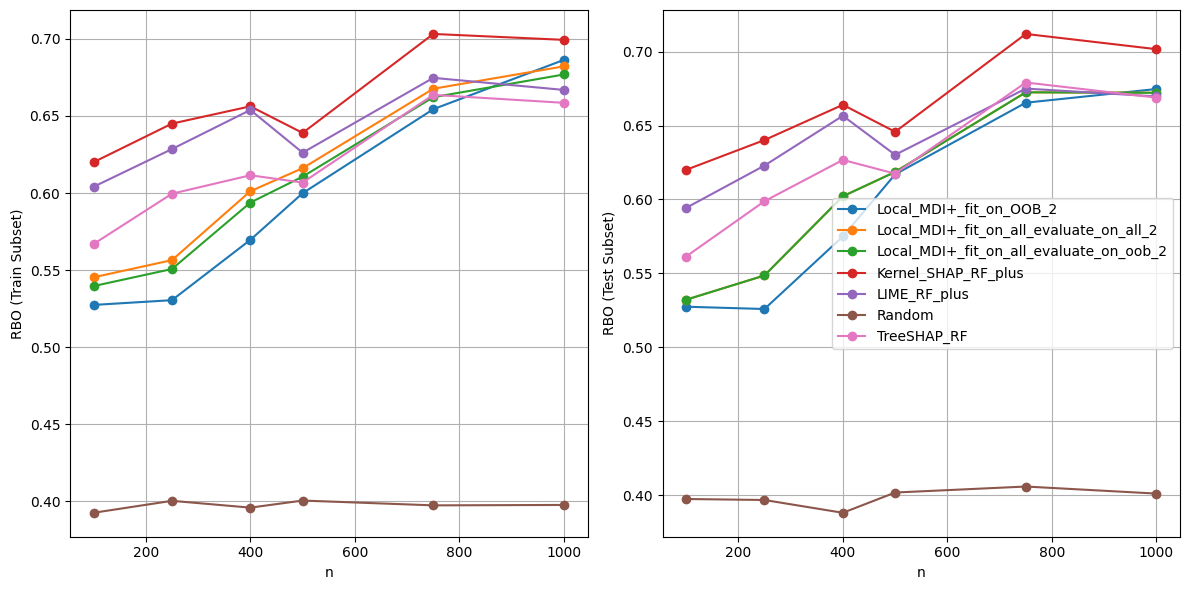

In [24]:
# Create a 2x2 subplot layout
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Define the DataFrame
df = heritability_02_df

# Plot each subplot
for method in methods_3:
    subset = df[df['fi'] == method]

    # Train AUROC
    axes[0].plot(subset['n'], subset['rbo_train_subset'], marker='o', linestyle='-', label=method)
    axes[0].set_xlabel('n')
    axes[0].set_ylabel('RBO (Train Subset)')
    axes[0].grid(True)

    # Train AUPRC
    axes[1].plot(subset['n'], subset['rbo_test_subset'], marker='o', linestyle='-', label=method)
    axes[1].set_xlabel('n')
    axes[1].set_ylabel('RBO (Test Subset)')
    axes[1].legend(loc='best')
    axes[1].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

KeyError: 'auroc_train_subset'

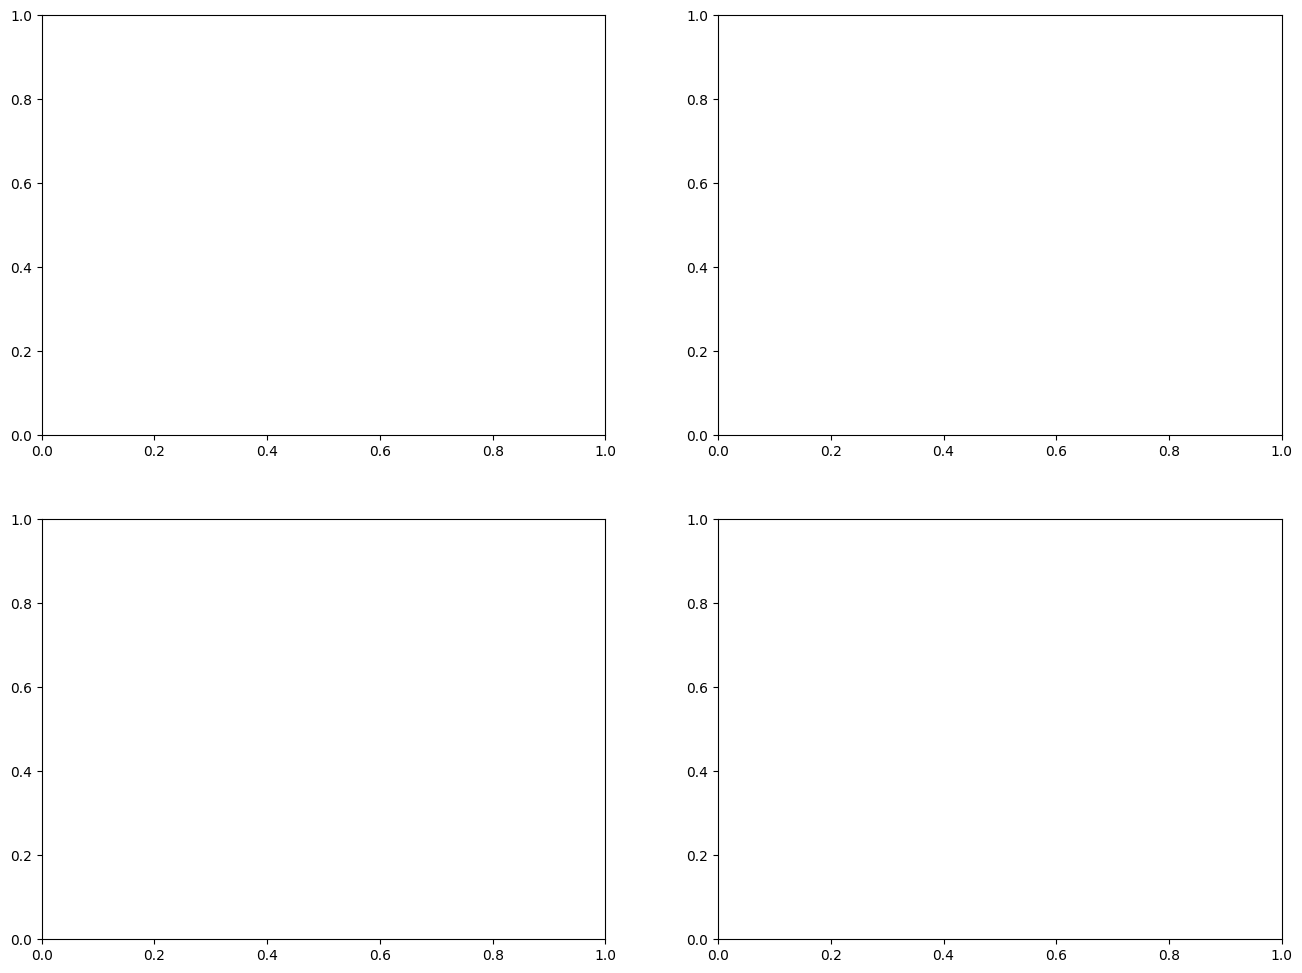

In [16]:
# Create a 2x2 subplot layout
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Define the DataFrame
df = heritability_01_df

# Plot each subplot
for method in methods_2:
    subset = df[df['fi'] == method]

    # Train AUROC
    axes[0, 0].plot(subset['n'], subset['auroc_train_subset'], marker='o', linestyle='-', label=method)
    axes[0, 0].set_xlabel('n')
    axes[0, 0].set_ylabel('AUROC (Train Subset)')
    axes[0, 0].set_title('Train AUROC for Different Methods')
    axes[0, 0].grid(True)

    # Train AUPRC
    axes[0, 1].plot(subset['n'], subset['auprc_train_subset'], marker='o', linestyle='-', label=method)
    axes[0, 1].set_xlabel('n')
    axes[0, 1].set_ylabel('AUPRC (Train Subset)')
    axes[0, 1].set_title('Train AUPRC for Different Methods')
    axes[0, 1].grid(True)

    # Test AUROC
    axes[1, 0].plot(subset['n'], subset['auroc_test_subset'], marker='o', linestyle='-', label=method)
    axes[1, 0].set_xlabel('n')
    axes[1, 0].set_ylabel('AUROC (Test Subset)')
    axes[1, 0].set_title('Test AUROC for Different Methods')
    axes[1, 0].legend(loc='best')
    axes[1, 0].grid(True)

    # Test AUPRC
    axes[1, 1].plot(subset['n'], subset['auprc_test_subset'], marker='o', linestyle='-', label=method)
    axes[1, 1].set_xlabel('n')
    axes[1, 1].set_ylabel('AUPRC (Test Subset)')
    axes[1, 1].set_title('Test AUPRC for Different Methods')
    axes[1, 1].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
# # Create a 2x2 subplot layout
# fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# # Define the DataFrame
# df = heritability_02_df

# # Plot each subplot
# for method in methods:
#     subset = df[df['fi'] == method]

#     # Train AUROC
#     axes[0, 0].plot(subset['n'], subset['auroc_train_subset'], marker='o', linestyle='-', label=method)
#     axes[0, 0].set_xlabel('n')
#     axes[0, 0].set_ylabel('AUROC (Train Subset)')
#     axes[0, 0].set_title('Train AUROC for Different Methods')
#     axes[0, 0].legend(loc='best')
#     axes[0, 0].grid(True)

#     # Train AUPRC
#     axes[0, 1].plot(subset['n'], subset['auprc_train_subset'], marker='o', linestyle='-', label=method)
#     axes[0, 1].set_xlabel('n')
#     axes[0, 1].set_ylabel('AUPRC (Train Subset)')
#     axes[0, 1].set_title('Train AUPRC for Different Methods')
#     axes[0, 1].legend(loc='best')
#     axes[0, 1].grid(True)

#     # Test AUROC
#     axes[1, 0].plot(subset['n'], subset['auroc_test_subset'], marker='o', linestyle='-', label=method)
#     axes[1, 0].set_xlabel('n')
#     axes[1, 0].set_ylabel('AUROC (Test Subset)')
#     axes[1, 0].set_title('Test AUROC for Different Methods')
#     axes[1, 0].legend(loc='best')
#     axes[1, 0].grid(True)

#     # Test AUPRC
#     axes[1, 1].plot(subset['n'], subset['auprc_test_subset'], marker='o', linestyle='-', label=method)
#     axes[1, 1].set_xlabel('n')
#     axes[1, 1].set_ylabel('AUPRC (Test Subset)')
#     axes[1, 1].set_title('Test AUPRC for Different Methods')
#     axes[1, 1].legend(loc='best')
#     axes[1, 1].grid(True)

# # Adjust layout
# plt.tight_layout()
# plt.show()

In [ ]:
# # Create a 2x2 subplot layout
# fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# # Define the DataFrame
# df = heritability_04_df

# # Plot each subplot
# for method in methods:
#     subset = df[df['fi'] == method]

#     # Train AUROC
#     axes[0, 0].plot(subset['n'], subset['auroc_train_subset'], marker='o', linestyle='-', label=method)
#     axes[0, 0].set_xlabel('n')
#     axes[0, 0].set_ylabel('AUROC (Train Subset)')
#     axes[0, 0].set_title('Train AUROC for Different Methods')
#     axes[0, 0].legend(loc='best')
#     axes[0, 0].grid(True)

#     # Train AUPRC
#     axes[0, 1].plot(subset['n'], subset['auprc_train_subset'], marker='o', linestyle='-', label=method)
#     axes[0, 1].set_xlabel('n')
#     axes[0, 1].set_ylabel('AUPRC (Train Subset)')
#     axes[0, 1].set_title('Train AUPRC for Different Methods')
#     axes[0, 1].legend(loc='best')
#     axes[0, 1].grid(True)

#     # Test AUROC
#     axes[1, 0].plot(subset['n'], subset['auroc_test_subset'], marker='o', linestyle='-', label=method)
#     axes[1, 0].set_xlabel('n')
#     axes[1, 0].set_ylabel('AUROC (Test Subset)')
#     axes[1, 0].set_title('Test AUROC for Different Methods')
#     axes[1, 0].legend(loc='best')
#     axes[1, 0].grid(True)

#     # Test AUPRC
#     axes[1, 1].plot(subset['n'], subset['auprc_test_subset'], marker='o', linestyle='-', label=method)
#     axes[1, 1].set_xlabel('n')
#     axes[1, 1].set_ylabel('AUPRC (Test Subset)')
#     axes[1, 1].set_title('Test AUPRC for Different Methods')
#     axes[1, 1].legend(loc='best')
#     axes[1, 1].grid(True)

# # Adjust layout
# plt.tight_layout()
# plt.show()

In [ ]:
# Create a 2x2 subplot layout
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Define the DataFrame
df = heritability_08_df

# Plot each subplot
for method in methods:
    subset = df[df['fi'] == method]

    # Train AUROC
    axes[0, 0].plot(subset['n'], subset['auroc_train_subset'], marker='o', linestyle='-', label=method)
    axes[0, 0].set_xlabel('n')
    axes[0, 0].set_ylabel('AUROC (Train Subset)')
    axes[0, 0].set_title('Train AUROC for Different Methods')
    axes[0, 0].legend(loc='best')
    axes[0, 0].grid(True)

    # Train AUPRC
    axes[0, 1].plot(subset['n'], subset['auprc_train_subset'], marker='o', linestyle='-', label=method)
    axes[0, 1].set_xlabel('n')
    axes[0, 1].set_ylabel('AUPRC (Train Subset)')
    axes[0, 1].set_title('Train AUPRC for Different Methods')
    axes[0, 1].legend(loc='best')
    axes[0, 1].grid(True)

    # Test AUROC
    axes[1, 0].plot(subset['n'], subset['auroc_test_subset'], marker='o', linestyle='-', label=method)
    axes[1, 0].set_xlabel('n')
    axes[1, 0].set_ylabel('AUROC (Test Subset)')
    axes[1, 0].set_title('Test AUROC for Different Methods')
    axes[1, 0].legend(loc='best')
    axes[1, 0].grid(True)

    # Test AUPRC
    axes[1, 1].plot(subset['n'], subset['auprc_test_subset'], marker='o', linestyle='-', label=method)
    axes[1, 1].set_xlabel('n')
    axes[1, 1].set_ylabel('AUPRC (Test Subset)')
    axes[1, 1].set_title('Test AUPRC for Different Methods')
    axes[1, 1].legend(loc='best')
    axes[1, 1].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
df = pd.DataFrame(combined_df_rf_plus)
averages = df.groupby('Model').mean().reset_index()
pd.DataFrame(averages)

### Summarise the Ablation Data

In [ ]:
train_size = combined_df["train_size"].unique()[0]
test_size = combined_df["test_size"].unique()[0]
print(f"The training size is {train_size} and the test size is {test_size}")

### Plot the Ablation Data Performance

In [ ]:
methods_train_subset = ['Kernel_SHAP_RF_plus','Local_MDI+_fit_on_OOB_RFPlus', 'Local_MDI+_fit_on_all_evaluate_on_all_RFPlus',
                        'Local_MDI+_fit_on_all_evaluate_on_oob_RFPlus','Local_MDI+_fit_on_inbag_RFPlus', 'LIME_RF_plus',
                        'TreeSHAP_RF', 'Local_MDI+_global_MDI_plus_RFPlus']
methods_test_subset = ['Kernel_SHAP_RF_plus','Local_MDI+_fit_on_OOB_RFPlus', 'Local_MDI+_fit_on_all_evaluate_on_all_RFPlus',
                        'Local_MDI+_fit_on_all_evaluate_on_oob_RFPlus','Local_MDI+_fit_on_inbag_RFPlus', 'LIME_RF_plus',
                        'TreeSHAP_RF', 'Local_MDI+_global_MDI_plus_RFPlus']
methods_test = ['Local_MDI+_fit_on_OOB_RFPlus', 'Local_MDI+_fit_on_all_evaluate_on_all_RFPlus',
                'Local_MDI+_fit_on_all_evaluate_on_oob_RFPlus','Local_MDI+_fit_on_inbag_RFPlus',
                 'TreeSHAP_RF', 'Local_MDI+_global_MDI_plus_RFPlus']
if baseline:
    methods_train_subset.append('Random')
    methods_test_subset.append('Random')
    methods_test.append('Random')
    methods_test_subset.append('Oracle_test_RFPlus')
    methods_test.append('Oracle_test_RFPlus')
num_features = combined_df['num_features_masked'].drop_duplicates().values[0]
metrics = {"regression": ["MSE", "R_2"], "classification": ["AUROC","AUPRC", "F1"]}
ablation_models = {"regression": ["RF_Regressor", "Linear", "Kernel_Ridge", "XGB_Regressor", "RF_Plus_Regressor"], 
                   "classification": ["RF_Classifier","LogisticCV", "SVM", "XGBoost_Classifier", "RF_Plus_Classifier"]}

In [ ]:
color_map = {
    'Kernel_SHAP_RF_plus': '#1f77b4',  # blue
    'Local_MDI+_fit_on_OOB_RFPlus': '#ff7f0e',  # orange
    'Local_MDI+_fit_on_all_evaluate_on_all_RFPlus': '#2ca02c',  # green
    'Local_MDI+_fit_on_all_evaluate_on_oob_RFPlus': '#d62728',  # red
    'Local_MDI+_fit_on_inbag_RFPlus': '#9467bd',  # purple
    'LIME_RF_plus': '#8c564b',  # brown
    'Oracle_test_RFPlus': '#e377c2',  # pink
    'Random': '#7f7f7f',  # gray
    'TreeSHAP_RF': '#bcbd22',  # yellow
    'Local_MDI+_global_MDI_plus_RFPlus': '#17becf'  # cyan
}

#### Training Subset Data

In [ ]:
fig, axs = plt.subplots(len(ablation_models[task]), len(metrics[task]), figsize=(15, 20))
for i, a_model in enumerate(ablation_models[task]):
    for j, metric in enumerate(metrics[task]):
        results = {}
        for m in methods_train_subset:
            results[m] = []
        for m in methods_train_subset:
            if metric == "MSE":
                results[m].append(-1*np.sqrt(combined_df[combined_df['fi'] == m][a_model+"_train_subset_"+metric+f"_before_ablation_absolute"].mean()))
                for k in range(num_features):
                    results[m].append(-1*np.sqrt(combined_df[combined_df['fi'] == m][a_model+"_train_subset_"+metric+f"_after_ablation_{k+1}_absolute"].mean()))
            else:
                results[m].append(combined_df[combined_df['fi'] == m][a_model+"_train_subset_"+metric+f"_before_ablation_absolute"].mean())
                for k in range(num_features):
                    results[m].append(combined_df[combined_df['fi'] == m][a_model+"_train_subset_"+metric+f"_after_ablation_{k+1}_absolute"].mean())
        ax = axs[i, j]
        for m in methods_train_subset:
            color = color_map[m]
            if m in ["TreeSHAP_RF", "Kernel_SHAP_RF_plus", "LIME_RF_plus", "Random"]:
                ax.plot(range(num_features+1), results[m], label=m, linestyle='dashed', color=color)
            else:
                ax.plot(range(num_features+1), results[m], label=m, color=color)
        if metric == "MSE":
            ax.set(xlabel='Number of features ablated', ylabel= f"Negative Root({metric})",
                title=f'Ablation model = {a_model}, Train size = 100')
        else:
            ax.set(xlabel='Number of features ablated', ylabel=metric,
                    title=f'Ablation model = {a_model}, Train size = 100')
        if i == 0 and j == 0:
            ax.legend()

plt.tight_layout()
plt.savefig(f"./{task_name}_{task}_train_removal_absolute.png")
plt.show()

In [ ]:
fig, axs = plt.subplots(len(ablation_models[task]), len(metrics[task]), figsize=(15, 20))
for i, a_model in enumerate(ablation_models[task]):
    for j, metric in enumerate(metrics[task]):
        results = {}
        for m in methods_train_subset:
            results[m] = []
        for m in methods_train_subset:
            if metric == "MSE":
                results[m].append(-1*np.sqrt(combined_df[combined_df['fi'] == m][a_model+"_train_subset_"+metric+f"_before_ablation_positive"].mean()))
                for k in range(num_features):
                    results[m].append(-1*np.sqrt(combined_df[combined_df['fi'] == m][a_model+"_train_subset_"+metric+f"_after_ablation_{k+1}_positive"].mean()))
            else:
                results[m].append(combined_df[combined_df['fi'] == m][a_model+"_train_subset_"+metric+f"_before_ablation_positive"].mean())
                for k in range(num_features):
                    results[m].append(combined_df[combined_df['fi'] == m][a_model+"_train_subset_"+metric+f"_after_ablation_{k+1}_positive"].mean())
        ax = axs[i, j]
        for m in methods_train_subset:
            color = color_map[m]
            if m in ["TreeSHAP_RF", "Kernel_SHAP_RF_plus", "LIME_RF_plus", "Random"]:
                ax.plot(range(num_features+1), results[m], label=m, linestyle='dashed', color=color)
            else:
                ax.plot(range(num_features+1), results[m], label=m, color=color)
        if metric == "MSE":
            ax.set(xlabel='Number of features ablated', ylabel= f"Negative Root({metric})",
                title=f'Ablation model = {a_model}, Train size = 100')
        else:
            ax.set(xlabel='Number of features ablated', ylabel=metric,
                    title=f'Ablation model = {a_model}, Train size = 100')
        if i == 0 and j == 0:
            ax.legend()

plt.tight_layout()
plt.savefig(f"./{task_name}_{task}_train_removal_positive.png")
plt.show()

In [ ]:
fig, axs = plt.subplots(len(ablation_models[task]), len(metrics[task]), figsize=(15, 20))
for i, a_model in enumerate(ablation_models[task]):
    for j, metric in enumerate(metrics[task]):
        results = {}
        for m in methods_train_subset:
            results[m] = []
        for m in methods_train_subset:
            if metric == "MSE":
                results[m].append(-1*np.sqrt(combined_df[combined_df['fi'] == m][a_model+"_train_subset_"+metric+f"_before_ablation_negative"].mean()))
                for k in range(num_features):
                    results[m].append(-1*np.sqrt(combined_df[combined_df['fi'] == m][a_model+"_train_subset_"+metric+f"_after_ablation_{k+1}_negative"].mean()))
            else:
                results[m].append(combined_df[combined_df['fi'] == m][a_model+"_train_subset_"+metric+f"_before_ablation_negative"].mean())
                for k in range(num_features):
                    results[m].append(combined_df[combined_df['fi'] == m][a_model+"_train_subset_"+metric+f"_after_ablation_{k+1}_negative"].mean())
        ax = axs[i, j]
        for m in methods_train_subset:
            color = color_map[m]
            if m in ["TreeSHAP_RF", "Kernel_SHAP_RF_plus", "LIME_RF_plus", "Random"]:
                ax.plot(range(num_features+1), results[m], label=m, linestyle='dashed', color=color)
            else:
                ax.plot(range(num_features+1), results[m], label=m, color=color)
        if metric == "MSE":
            ax.set(xlabel='Number of features ablated', ylabel= f"Negative Root({metric})",
                title=f'Ablation model = {a_model}, Train size = 100')
        else:
            ax.set(xlabel='Number of features ablated', ylabel=metric,
                    title=f'Ablation model = {a_model}, Train size = 100')
        if i == 0 and j == 0:
            ax.legend()

plt.tight_layout()
plt.savefig(f"./{task_name}_{task}_train_removal_negative.png")
plt.show()

In [ ]:
# fig, axs = plt.subplots(len(ablation_models[task]), len(metrics[task]), figsize=(15, 20))
# for i, a_model in enumerate(ablation_models[task]):
#     for j, metric in enumerate(metrics[task]):
#         results = {}
#         for m in methods_train_subset:
#             results[m] = []
#         for m in methods_train_subset:
#             if metric == "MSE":
#                 results[m].append(-1*np.sqrt(combined_df[combined_df['fi'] == m][a_model+"_train_subset_"+metric+f"_before_ablation_addition"].mean()))
#                 for k in range(num_features):
#                     results[m].append(-1*np.sqrt(combined_df[combined_df['fi'] == m][a_model+"_train_subset_"+metric+f"_after_ablation_{k+1}_addition"].mean()))
#             else:
#                 results[m].append(combined_df[combined_df['fi'] == m][a_model+"_train_subset_"+metric+f"_before_ablation_addition"].mean())
#                 for k in range(num_features):
#                     results[m].append(combined_df[combined_df['fi'] == m][a_model+"_train_subset_"+metric+f"_after_ablation_{k+1}_addition"].mean())
#         ax = axs[i, j]
#         for m in methods_train_subset:
#             color = color_map[m]
#             if m in ["TreeSHAP_RF", "Kernel_SHAP_RF_plus", "LIME_RF_plus", "Random"]:
#                 ax.plot(range(num_features+1), results[m], label=m, linestyle='dashed', color=color)
#             else:
#                 ax.plot(range(num_features+1), results[m], label=m, color=color)
#         if metric == "MSE":
#             ax.set(xlabel='Number of features ablated', ylabel= f"Negative Root({metric})",
#                 title=f'Ablation model = {a_model}, Train size = 100')
#         else:
#             ax.set(xlabel='Number of features ablated', ylabel=metric,
#                     title=f'Ablation model = {a_model}, Train size = 100')
#         if i == 0 and j == 0:
#             ax.legend()

# plt.tight_layout()
# # plt.savefig(f"./{task_name}_{task}_train_addition.png")
# plt.show()

#### Test Subset Data

In [ ]:
fig, axs = plt.subplots(len(ablation_models[task]), len(metrics[task]), figsize=(15, 20))
for i, a_model in enumerate(ablation_models[task]):
    for j, metric in enumerate(metrics[task]):
        results = {}
        for m in methods_test_subset:
            results[m] = []
        for m in methods_test_subset:
            if metric == "MSE":
                results[m].append(-1*np.sqrt(combined_df[combined_df['fi'] == m][a_model+"_test_subset_"+metric+f"_before_ablation_absolute"].mean()))
                for k in range(num_features):
                    results[m].append(-1*np.sqrt(combined_df[combined_df['fi'] == m][a_model+"_test_subset_"+metric+f"_after_ablation_{k+1}_absolute"].mean()))
            else:
                results[m].append(combined_df[combined_df['fi'] == m][a_model+"_test_subset_"+metric+f"_before_ablation_absolute"].mean())
                for k in range(num_features):
                    results[m].append(combined_df[combined_df['fi'] == m][a_model+"_test_subset_"+metric+f"_after_ablation_{k+1}_absolute"].mean())
        ax = axs[i, j]
        for m in methods_test_subset:
            color = color_map[m]
            if m in ["TreeSHAP_RF", "Kernel_SHAP_RF_plus", "LIME_RF_plus", "Random"]:
                ax.plot(range(num_features+1), results[m], label=m, linestyle='dashed', color=color)
            else:
                ax.plot(range(num_features+1), results[m], label=m, color=color)
        if metric == "MSE":
            ax.set(xlabel='Number of features ablated', ylabel= f"Negative Root({metric})",
                title=f'Ablation model = {a_model}, Test size = 100')
        else:
            ax.set(xlabel='Number of features ablated', ylabel=metric,
                    title=f'Ablation model = {a_model}, Test size = 100')
        if i == 0 and j == 0:
            ax.legend()

plt.tight_layout()
plt.savefig(f"./{task_name}_{task}_test_subset_removal_absolute.png")
plt.show()

In [ ]:
fig, axs = plt.subplots(len(ablation_models[task]), len(metrics[task]), figsize=(15, 20))
for i, a_model in enumerate(ablation_models[task]):
    for j, metric in enumerate(metrics[task]):
        results = {}
        for m in methods_test_subset:
            results[m] = []
        for m in methods_test_subset:
            if metric == "MSE":
                results[m].append(-1*np.sqrt(combined_df[combined_df['fi'] == m][a_model+"_test_subset_"+metric+f"_before_ablation_positive"].mean()))
                for k in range(num_features):
                    results[m].append(-1*np.sqrt(combined_df[combined_df['fi'] == m][a_model+"_test_subset_"+metric+f"_after_ablation_{k+1}_positive"].mean()))
            else:
                results[m].append(combined_df[combined_df['fi'] == m][a_model+"_test_subset_"+metric+f"_before_ablation_positive"].mean())
                for k in range(num_features):
                    results[m].append(combined_df[combined_df['fi'] == m][a_model+"_test_subset_"+metric+f"_after_ablation_{k+1}_positive"].mean())
        ax = axs[i, j]
        for m in methods_test_subset:
            color = color_map[m]
            if m in ["TreeSHAP_RF", "Kernel_SHAP_RF_plus", "LIME_RF_plus", "Random"]:
                ax.plot(range(num_features+1), results[m], label=m, linestyle='dashed', color=color)
            else:
                ax.plot(range(num_features+1), results[m], label=m, color=color)
        if metric == "MSE":
            ax.set(xlabel='Number of features ablated', ylabel= f"Negative Root({metric})",
                title=f'Ablation model = {a_model}, Test size = 100')
        else:
            ax.set(xlabel='Number of features ablated', ylabel=metric,
                    title=f'Ablation model = {a_model}, Test size = 100')
        if i == 0 and j == 0:
            ax.legend()

plt.tight_layout()
plt.savefig(f"./{task_name}_{task}_test_subset_removal_positive.png")
plt.show()

In [ ]:
fig, axs = plt.subplots(len(ablation_models[task]), len(metrics[task]), figsize=(15, 20))
for i, a_model in enumerate(ablation_models[task]):
    for j, metric in enumerate(metrics[task]):
        results = {}
        for m in methods_test_subset:
            results[m] = []
        for m in methods_test_subset:
            if metric == "MSE":
                results[m].append(-1*np.sqrt(combined_df[combined_df['fi'] == m][a_model+"_test_subset_"+metric+f"_before_ablation_negative"].mean()))
                for k in range(num_features):
                    results[m].append(-1*np.sqrt(combined_df[combined_df['fi'] == m][a_model+"_test_subset_"+metric+f"_after_ablation_{k+1}_negative"].mean()))
            else:
                results[m].append(combined_df[combined_df['fi'] == m][a_model+"_test_subset_"+metric+f"_before_ablation_negative"].mean())
                for k in range(num_features):
                    results[m].append(combined_df[combined_df['fi'] == m][a_model+"_test_subset_"+metric+f"_after_ablation_{k+1}_negative"].mean())
        ax = axs[i, j]
        for m in methods_test_subset:
            color = color_map[m]
            if m in ["TreeSHAP_RF", "Kernel_SHAP_RF_plus", "LIME_RF_plus", "Random"]:
                ax.plot(range(num_features+1), results[m], label=m, linestyle='dashed', color=color)
            else:
                ax.plot(range(num_features+1), results[m], label=m, color=color)
        if metric == "MSE":
            ax.set(xlabel='Number of features ablated', ylabel= f"Negative Root({metric})",
                title=f'Ablation model = {a_model}, Test size = 100')
        else:
            ax.set(xlabel='Number of features ablated', ylabel=metric,
                    title=f'Ablation model = {a_model}, Test size = 100')
        if i == 0 and j == 0:
            ax.legend()

plt.tight_layout()
plt.savefig(f"./{task_name}_{task}_test_subset_removal_negative.png")
plt.show()

In [ ]:
# fig, axs = plt.subplots(len(ablation_models[task]), len(metrics[task]), figsize=(15, 20))
# for i, a_model in enumerate(ablation_models[task]):
#     for j, metric in enumerate(metrics[task]):
#         results = {}
#         for m in methods_test_subset:
#             results[m] = []
#         for m in methods_test_subset:
#             if metric == "MSE":
#                 results[m].append(-1*np.sqrt(combined_df[combined_df['fi'] == m][a_model+"_test_subset_"+metric+f"_before_ablation_addition"].mean()))
#                 for k in range(num_features):
#                     results[m].append(-1*np.sqrt(combined_df[combined_df['fi'] == m][a_model+"_test_subset_"+metric+f"_after_ablation_{k+1}_addition"].mean()))
#             else:
#                 results[m].append(combined_df[combined_df['fi'] == m][a_model+"_test_subset_"+metric+f"_before_ablation_addition"].mean())
#                 for k in range(num_features):
#                     results[m].append(combined_df[combined_df['fi'] == m][a_model+"_test_subset_"+metric+f"_after_ablation_{k+1}_addition"].mean())
#         ax = axs[i, j]
#         for m in methods_test_subset:
#             color = color_map[m]
#             if m in ["TreeSHAP_RF", "Kernel_SHAP_RF_plus", "LIME_RF_plus", "Random"]:
#                 ax.plot(range(num_features+1), results[m], label=m, linestyle='dashed', color=color)
#             else:
#                 ax.plot(range(num_features+1), results[m], label=m, color=color)
#         if metric == "MSE":
#             ax.set(xlabel='Number of features ablated', ylabel= f"Negative Root({metric})",
#                 title=f'Ablation model = {a_model}, Test size = 100')
#         else:
#             ax.set(xlabel='Number of features ablated', ylabel=metric,
#                     title=f'Ablation model = {a_model}, Test size = 100')
#         if i == 0 and j == 0:
#             ax.legend()

# plt.tight_layout()
# # plt.savefig(f"./{task_name}_{task}_test_subset_addition.png")
# plt.show()

#### Test Data

In [ ]:
fig, axs = plt.subplots(len(ablation_models[task]), len(metrics[task]), figsize=(15, 20))
for i, a_model in enumerate(ablation_models[task]):
    for j, metric in enumerate(metrics[task]):
        results = {}
        for m in methods_test:
            results[m] = []
        for m in methods_test:
            if metric == "MSE":
                results[m].append(-1*np.sqrt(combined_df[combined_df['fi'] == m][a_model+"_test_"+metric+f"_before_ablation_absolute"].mean()))
                for k in range(num_features):
                    results[m].append(-1*np.sqrt(combined_df[combined_df['fi'] == m][a_model+"_test_"+metric+f"_after_ablation_{k+1}_absolute"].mean()))
            else:
                results[m].append(combined_df[combined_df['fi'] == m][a_model+"_test_"+metric+f"_before_ablation_absolute"].mean())
                for k in range(num_features):
                    results[m].append(combined_df[combined_df['fi'] == m][a_model+"_test_"+metric+f"_after_ablation_{k+1}_absolute"].mean())
        ax = axs[i, j]
        for m in methods_test:
            color = color_map[m]
            if m in ["TreeSHAP_RF", "Kernel_SHAP_RF_plus", "LIME_RF_plus", "Random"]:
                ax.plot(range(num_features+1), results[m], label=m, linestyle='dashed', color=color)
            else:
                ax.plot(range(num_features+1), results[m], label=m, color=color)
        if metric == "MSE":
            ax.set(xlabel='Number of features ablated', ylabel= f"Negative Root({metric})",
                title=f'Ablation model = {a_model}, Test size = {test_size}')
        else:
            ax.set(xlabel='Number of features ablated', ylabel=metric,
                    title=f'Ablation model = {a_model}, Test size = {test_size}')
        if i == 0 and j == 0:
            ax.legend()

plt.tight_layout()
plt.savefig(f"./{task_name}_{task}_test_removal_absolute.png")
plt.show()

In [ ]:
fig, axs = plt.subplots(len(ablation_models[task]), len(metrics[task]), figsize=(15, 20))
for i, a_model in enumerate(ablation_models[task]):
    for j, metric in enumerate(metrics[task]):
        results = {}
        for m in methods_test:
            results[m] = []
        for m in methods_test:
            if metric == "MSE":
                results[m].append(-1*np.sqrt(combined_df[combined_df['fi'] == m][a_model+"_test_"+metric+f"_before_ablation_positive"].mean()))
                for k in range(num_features):
                    results[m].append(-1*np.sqrt(combined_df[combined_df['fi'] == m][a_model+"_test_"+metric+f"_after_ablation_{k+1}_positive"].mean()))
            else:
                results[m].append(combined_df[combined_df['fi'] == m][a_model+"_test_"+metric+f"_before_ablation_positive"].mean())
                for k in range(num_features):
                    results[m].append(combined_df[combined_df['fi'] == m][a_model+"_test_"+metric+f"_after_ablation_{k+1}_positive"].mean())
        ax = axs[i, j]
        for m in methods_test:
            color = color_map[m]
            if m in ["TreeSHAP_RF", "Kernel_SHAP_RF_plus", "LIME_RF_plus", "Random"]:
                ax.plot(range(num_features+1), results[m], label=m, linestyle='dashed', color=color)
            else:
                ax.plot(range(num_features+1), results[m], label=m, color=color)
        if metric == "MSE":
            ax.set(xlabel='Number of features ablated', ylabel= f"Negative Root({metric})",
                title=f'Ablation model = {a_model}, Test size = {test_size}')
        else:
            ax.set(xlabel='Number of features ablated', ylabel=metric,
                    title=f'Ablation model = {a_model}, Test size = {test_size}')
        if i == 0 and j == 0:
            ax.legend()

plt.tight_layout()
plt.savefig(f"./{task_name}_{task}_test_removal_positive.png")
plt.show()

In [ ]:
fig, axs = plt.subplots(len(ablation_models[task]), len(metrics[task]), figsize=(15, 20))
for i, a_model in enumerate(ablation_models[task]):
    for j, metric in enumerate(metrics[task]):
        results = {}
        for m in methods_test:
            results[m] = []
        for m in methods_test:
            if metric == "MSE":
                results[m].append(-1*np.sqrt(combined_df[combined_df['fi'] == m][a_model+"_test_"+metric+f"_before_ablation_negative"].mean()))
                for k in range(num_features):
                    results[m].append(-1*np.sqrt(combined_df[combined_df['fi'] == m][a_model+"_test_"+metric+f"_after_ablation_{k+1}_negative"].mean()))
            else:
                results[m].append(combined_df[combined_df['fi'] == m][a_model+"_test_"+metric+f"_before_ablation_negative"].mean())
                for k in range(num_features):
                    results[m].append(combined_df[combined_df['fi'] == m][a_model+"_test_"+metric+f"_after_ablation_{k+1}_negative"].mean())
        ax = axs[i, j]
        for m in methods_test:
            color = color_map[m]
            if m in ["TreeSHAP_RF", "Kernel_SHAP_RF_plus", "LIME_RF_plus", "Random"]:
                ax.plot(range(num_features+1), results[m], label=m, linestyle='dashed', color=color)
            else:
                ax.plot(range(num_features+1), results[m], label=m, color=color)
        if metric == "MSE":
            ax.set(xlabel='Number of features ablated', ylabel= f"Negative Root({metric})",
                title=f'Ablation model = {a_model}, Test size = {test_size}')
        else:
            ax.set(xlabel='Number of features ablated', ylabel=metric,
                    title=f'Ablation model = {a_model}, Test size = {test_size}')
        if i == 0 and j == 0:
            ax.legend()

plt.tight_layout()
plt.savefig(f"./{task_name}_{task}_test_removal_negative.png")
plt.show()

In [ ]:
# fig, axs = plt.subplots(len(ablation_models[task]), len(metrics[task]), figsize=(15, 20))
# for i, a_model in enumerate(ablation_models[task]):
#     for j, metric in enumerate(metrics[task]):
#         results = {}
#         for m in methods_test:
#             results[m] = []
#         for m in methods_test:
#             if metric == "MSE":
#                 results[m].append(-1*np.sqrt(combined_df[combined_df['fi'] == m][a_model+"_test_"+metric+f"_before_ablation_addition"].mean()))
#                 for k in range(num_features):
#                     results[m].append(-1*np.sqrt(combined_df[combined_df['fi'] == m][a_model+"_test_"+metric+f"_after_ablation_{k+1}_addition"].mean()))
#             else:
#                 results[m].append(combined_df[combined_df['fi'] == m][a_model+"_test_"+metric+f"_before_ablation_addition"].mean())
#                 for k in range(num_features):
#                     results[m].append(combined_df[combined_df['fi'] == m][a_model+"_test_"+metric+f"_after_ablation_{k+1}_addition"].mean())
#         ax = axs[i, j]
#         for m in methods_test:
#             color = color_map[m]
#             if m in ["TreeSHAP_RF", "Kernel_SHAP_RF_plus", "LIME_RF_plus", "Random"]:
#                 ax.plot(range(num_features+1), results[m], label=m, linestyle='dashed', color=color)
#             else:
#                 ax.plot(range(num_features+1), results[m], label=m, color=color)
#         if metric == "MSE":
#             ax.set(xlabel='Number of features ablated', ylabel= f"Negative Root({metric})",
#                 title=f'Ablation model = {a_model}, Test size = {test_size}')
#         else:
#             ax.set(xlabel='Number of features ablated', ylabel=metric,
#                     title=f'Ablation model = {a_model}, Test size = {test_size}')
#         if i == 0 and j == 0:
#             ax.legend()

# plt.tight_layout()
# # plt.savefig(f"./{task_name}_{task}_test_addition.png")
# plt.show()